In [1]:
import pickle
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors
from types import SimpleNamespace


In [2]:
with open('_cm_multivar.py','r') as f:
    lines = f.readlines()
lines = '\n'.join(lines)
lines = lines.replace('from .colors import LinearSegmentedColormap, MultivarColormap', \
                      'from matplotlib.colors import LinearSegmentedColormap, MultivarColormap')

exec(lines)

_cm_listed_multivar = SimpleNamespace()
_cm_listed_multivar.cmaps = cmaps

for n in range(9):
    for typ in ['Add', 'Sub']:
        for var in ['A','B','C','D']:
            s = ''
            for key in _cm_listed_multivar.cmaps.keys():
                if key[0] == str(n) and key[-2] == var and typ in key:
                    s += key + ' '
            if len(s)>0:
                print(s)

2VarAddA0 2VarAddA1 
2VarAddB0 2VarAddB1 
2VarSubA0 2VarSubA1 
2VarSubB0 2VarSubB1 
3VarAddA0 3VarAddA1 3VarAddA2 
3VarAddB0 3VarAddB1 3VarAddB2 
3VarAddC0 3VarAddC1 3VarAddC2 
3VarAddD0 3VarAddD1 3VarAddD2 
3VarSubA0 3VarSubA1 3VarSubA2 
3VarSubB0 3VarSubB1 3VarSubB2 
3VarSubC0 3VarSubC1 3VarSubC2 
3VarSubD0 3VarSubD1 3VarSubD2 
4VarAddA0 4VarAddA1 4VarAddA2 4VarAddA3 
4VarAddB0 4VarAddB1 4VarAddB2 4VarAddB3 
4VarSubA0 4VarSubA1 4VarSubA2 4VarSubA3 
4VarSubB0 4VarSubB1 4VarSubB2 4VarSubB3 
5VarAddA0 5VarAddA1 5VarAddA2 5VarAddA3 5VarAddA4 
5VarSubA0 5VarSubA1 5VarSubA2 5VarSubA3 5VarSubA4 
6VarAddA0 6VarAddA1 6VarAddA2 6VarAddA3 6VarAddA4 6VarAddA5 
6VarSubA0 6VarSubA1 6VarSubA2 6VarSubA3 6VarSubA4 6VarSubA5 
7VarAddA0 7VarAddA1 7VarAddA2 7VarAddA3 7VarAddA4 7VarAddA5 7VarAddA6 
7VarSubA0 7VarSubA1 7VarSubA2 7VarSubA3 7VarSubA4 7VarSubA5 7VarSubA6 
8VarAddA0 8VarAddA1 8VarAddA2 8VarAddA3 8VarAddA4 8VarAddA5 8VarAddA6 8VarAddA7 
8VarSubA0 8VarSubA1 8VarSubA2 8VarSubA3 8VarSubA4 8VarSub

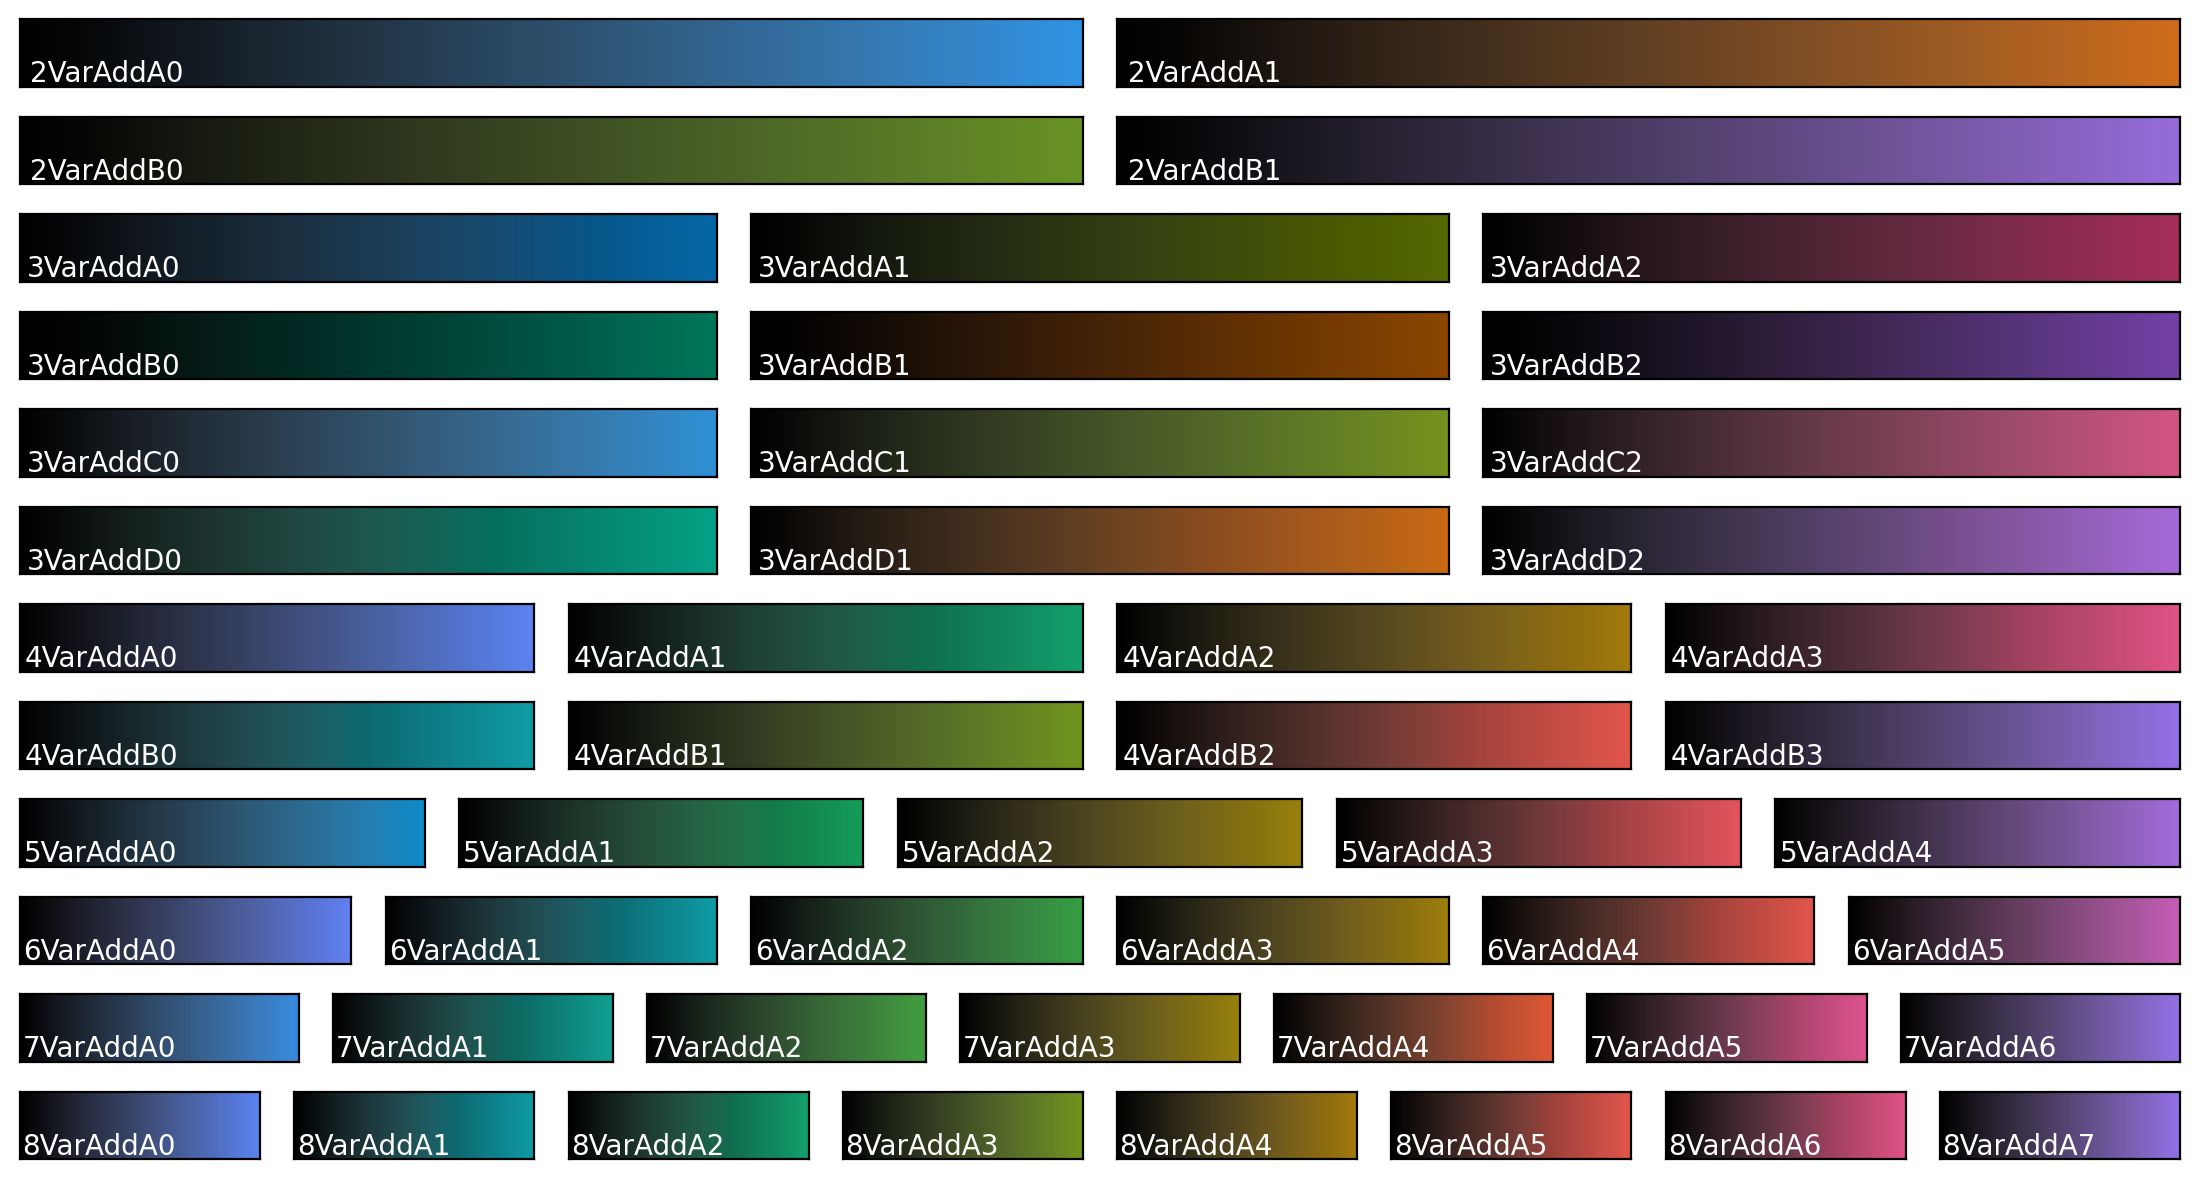

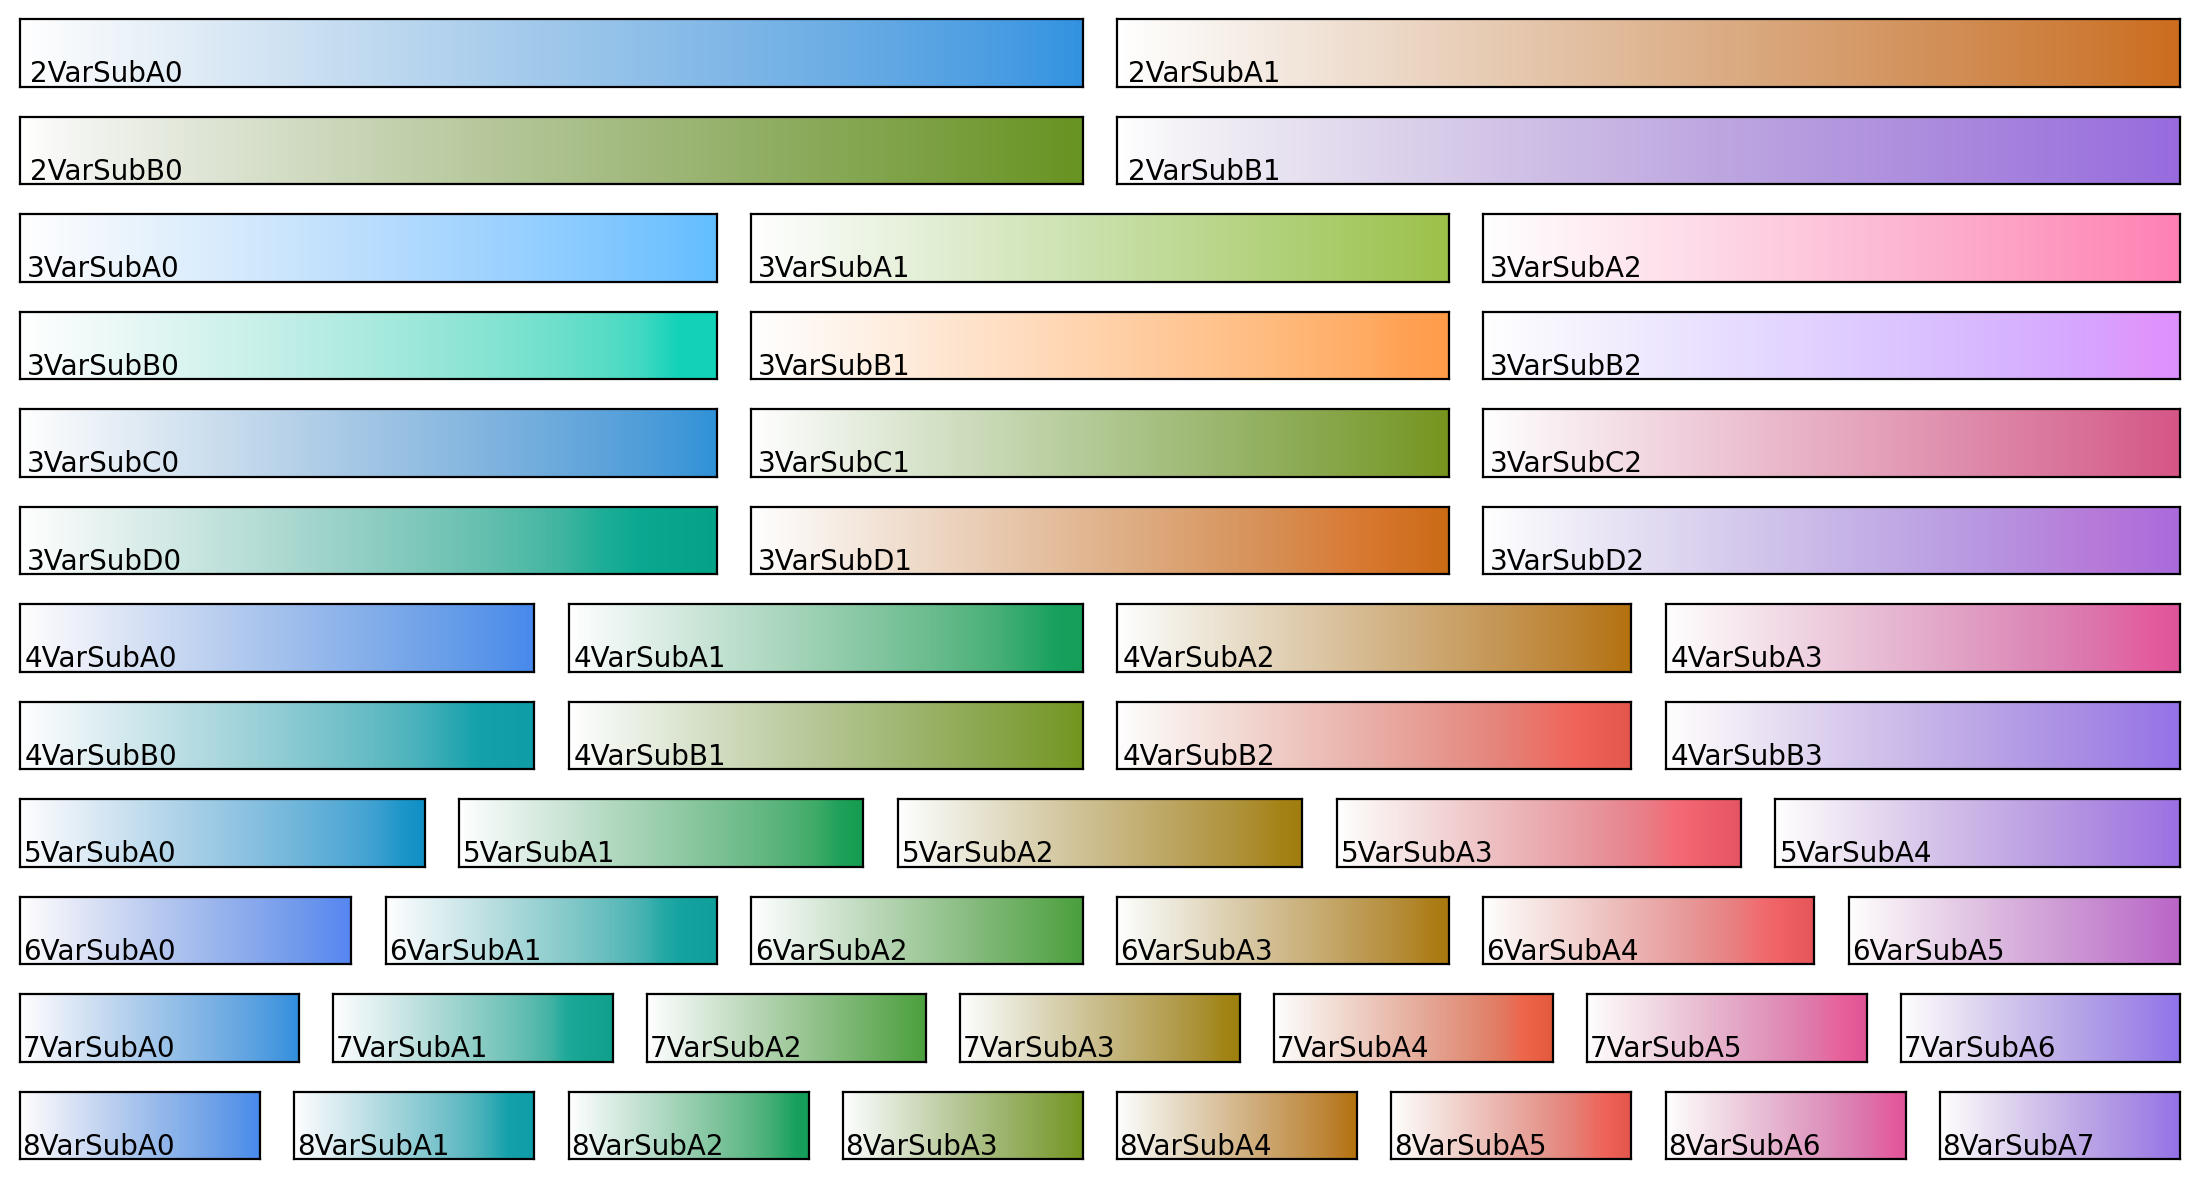

In [9]:
fig, axes = plt.subplots((12), 1, dpi = 200, figsize = (12,6), facecolor = 'w')
for ax in axes:
    ax.set_yticks([])
    ax.set_xticks([])
fig.tight_layout()
row = 0
for n in range(2, 9, 1):
    if n == 2:
        v = ['A','B']
    elif n == 3:
        v = ['A', 'B', 'C', 'D']
    elif n == 4:
        v = ['A','B']
    else:
        v = ['A']
    for version in v:
        for typ in ['Add']: #, 'Sub']:
            name = f'{n}Var{typ}{version}'
            pos = axes[row].get_position()
            axes[row].remove()
            space = 0.1/7
            step = (0.9-space*(n-1))/n
            for i in range(n):
                #recttuple (left, bottom, width, height)
                recttuple = (0.05 + i*(step+space), pos.y0, step, pos.y1-pos.y0)
                ax = fig.add_axes(recttuple)
                ax.set_yticks([])
                ax.set_xticks([])
                cmap = _cm_listed_multivar.cmaps[name+str(i)](np.linspace(0,1,256))[:,:3]
                ax.imshow(cmap*np.ones((20,256,3)), aspect = 'auto')
                ax.text(2, 18, name+str(i), color = 'w')
            row += 1
fig.savefig('additive_cmaps.png')
            
fig, axes = plt.subplots((12), 1, dpi = 200, figsize = (12,6), facecolor = 'w')
for ax in axes:
    ax.set_yticks([])
    ax.set_xticks([])
fig.tight_layout()
row = 0
for n in range(2, 9, 1):
    if n == 2:
        v = ['A','B']
    elif n == 3:
        v = ['A', 'B', 'C', 'D']
    elif n == 4:
        v = ['A','B']
    else:
        v = ['A']
    for version in v:
        for typ in ['Sub']: #, 'Sub']:
            name = f'{n}Var{typ}{version}'
            pos = axes[row].get_position()
            axes[row].remove()
            space = 0.1/7
            step = (0.9-space*(n-1))/n
            for i in range(n):
                #recttuple (left, bottom, width, height)
                recttuple = (0.05 + i*(step+space), pos.y0, step, pos.y1-pos.y0)
                ax = fig.add_axes(recttuple)
                ax.set_yticks([])
                ax.set_xticks([])
                cmap = _cm_listed_multivar.cmaps[name+str(i)](np.linspace(0,1,256))[:,:3]
                ax.imshow(cmap*np.ones((20,256,3)), aspect = 'auto')
                ax.text(2, 18, name+str(i), color = 'k')
            row += 1
fig.savefig('subtractive_cmaps.png')

# Evaluate

In [10]:
import os
import colorspacious
import colorstamps
cvd_d = {"name": "sRGB1+CVD",
    "cvd_type": "deuteranomaly",
    "severity": 100}
cvd_p = {"name": "sRGB1+CVD",
    "cvd_type": "protanomaly",
    "severity": 100}
cvd_t = {"name": "sRGB1+CVD",
    "cvd_type": "tritanomaly",
    "severity": 100}

Additive colormaps

In [13]:
for n in range(2, 9, 1):
    folder = f'comlormap_plots/{n}/'
    if not os.path.exists(folder):
        os.makedirs(folder)
    if n == 2:
        v = ['A','B']
    elif n == 3:
        v = ['A', 'B', 'C', 'D']
    elif n == 4:
        v = ['A','B']
    else:
        v = ['A']
    for version in v:
        name = f'{n}VarAdd{version}'
        cmaps = [np.array(_cm_listed_multivar.cmaps[f'{name}{i}'](np.linspace(0,1,256))[:,:3]) for i in range(n)]
        # plot colorbars
        fig, axes = plt.subplots(4, n, figsize = (n*3, 3), dpi = 200, facecolor = 'w')
        axes = np.atleast_2d(axes)
        fig.suptitle(name)
        for i in range(n):
            axes[0,i].imshow(cmaps[i]*np.ones((40,256,3)))
            axes[0,i].set_title('full color vision')
            deuteranopia = colorspacious.cspace_convert(cmaps[i]*np.ones((40,256,3)), cvd_d, "sRGB1")
            deuteranopia[deuteranopia<0] = 0
            deuteranopia[deuteranopia>1] = 1
            axes[1,i].imshow(deuteranopia)
            axes[1,i].set_title('deuteranopia')
            protanomaly = colorspacious.cspace_convert(cmaps[i]*np.ones((40,256,3)), cvd_p, "sRGB1")
            protanomaly[protanomaly<0] = 0
            protanomaly[protanomaly>1] = 1
            axes[2,i].imshow(protanomaly)
            axes[2,i].set_title('protanomaly')
            tritanomaly = colorspacious.cspace_convert(cmaps[i]*np.ones((40,256,3)), cvd_t, "sRGB1")
            tritanomaly[tritanomaly<0] = 0
            tritanomaly[tritanomaly>1] = 1
            axes[3,i].imshow(tritanomaly)
            axes[3,i].set_title('tritanomaly')
        for ax in axes.ravel():
            ax.set_xticks([])
            ax.set_yticks([])
        fig.tight_layout()
        fig.savefig(folder+name+'cmaps.png')
        plt.close(fig)
        
        # make all 2D cmaps
        fig, axes = plt.subplots(n*(n-1)//2,5, figsize = (12,3*n*(n-1)//2), dpi = 100, facecolor = 'w')
        axes = np.atleast_2d(axes)
        k = 0
        for i in range(n):
            for j in range(i+1,n):
                cmap = cmaps[i][:,np.newaxis]+ cmaps[j][np.newaxis,:]
                cmap[cmap<0] = 0
                cmap[cmap>1] = 1
                colorstamps.Stamp(cmap[:,:]*(1-2e-5) + 1e-5).eval(axes[k]) # include a delta (+1e-5) to avoid error
                axes[k,0].set_title(f'{i} vs {j}')
                k += 1
        fig.tight_layout()
        fig.savefig(folder+name+'compare.png')
        print(folder+name+'compare.png', end = '\r')
        plt.close(fig)

subtractive colormaps

In [14]:
for n in range(2, 9, 1):
    folder = f'comlormap_plots/{n}/'
    if not os.path.exists(folder):
        os.makedirs(folder)
    if n == 2:
        v = ['A','B']
    elif n == 3:
        v = ['A', 'B', 'C', 'D']
    elif n == 4:
        v = ['A','B']
    else:
        v = ['A']
    for version in v:
        name = f'{n}VarSub{version}'
        cmaps = [np.array(_cm_listed_multivar.cmaps[f'{name}{i}'](np.linspace(0,1,256))[:,:3]) for i in range(n)]
        # plot colorbars
        fig, axes = plt.subplots(4, n, figsize = (n*3, 3), dpi = 200, facecolor = 'w')
        axes = np.atleast_2d(axes)
        fig.suptitle(name)
        for i in range(n):
            axes[0,i].imshow(cmaps[i]*np.ones((40,256,3)))
            axes[0,i].set_title('full color vision')
            deuteranopia = colorspacious.cspace_convert(cmaps[i]*np.ones((40,256,3)), cvd_d, "sRGB1")
            deuteranopia[deuteranopia<0] = 0
            deuteranopia[deuteranopia>1] = 1
            axes[1,i].imshow(deuteranopia)
            axes[1,i].set_title('deuteranopia')
            protanomaly = colorspacious.cspace_convert(cmaps[i]*np.ones((40,256,3)), cvd_p, "sRGB1")
            protanomaly[protanomaly<0] = 0
            protanomaly[protanomaly>1] = 1
            axes[2,i].imshow(protanomaly)
            axes[2,i].set_title('protanomaly')
            tritanomaly = colorspacious.cspace_convert(cmaps[i]*np.ones((40,256,3)), cvd_t, "sRGB1")
            tritanomaly[tritanomaly<0] = 0
            tritanomaly[tritanomaly>1] = 1
            axes[3,i].imshow(tritanomaly)
            axes[3,i].set_title('tritanomaly')
        for ax in axes.ravel():
            ax.set_xticks([])
            ax.set_yticks([])
        fig.tight_layout()
        fig.savefig(folder+name+'cmaps.png')
        plt.close(fig)
        
        # make all 2D cmaps
        fig, axes = plt.subplots(n*(n-1)//2,5, figsize = (12,3*n*(n-1)//2), dpi = 100, facecolor = 'w')
        axes = np.atleast_2d(axes)
        k = 0
        for i in range(n):
            for j in range(i+1,n):
                cmap = 1 -(1 -cmaps[i][:,np.newaxis]) -(1 -cmaps[j][np.newaxis,:])
                cmap[cmap<0] = 0
                cmap[cmap>1] = 1
                colorstamps.Stamp(cmap[:,:]*(1-2e-5) + 1e-5).eval(axes[k]) # include a delta (+1e-5) to avoid error
                axes[k,0].set_title(f'{i} vs {j}')
                k += 1
        fig.tight_layout()
        print(folder+name+'compare.png', end = '\r')
        plt.close(fig)

# visual inspection

[]

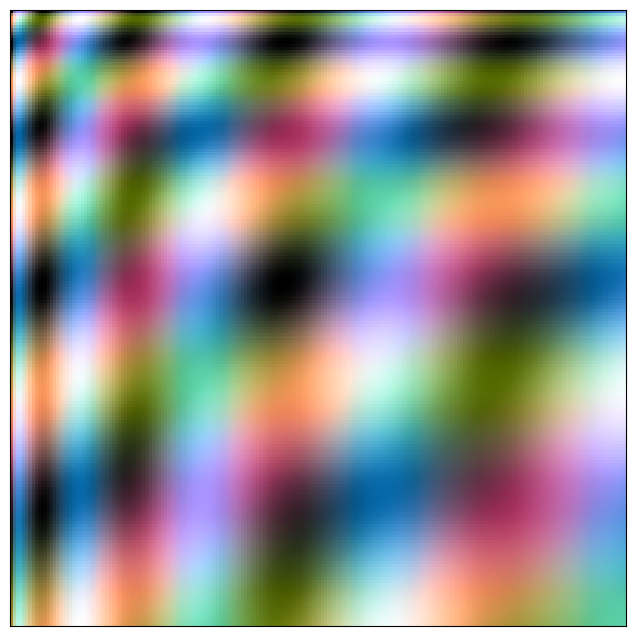

In [15]:
im_A = np.arange(200)[np.newaxis,:]*np.ones((200,200))
im_B = np.arange(200)[:,np.newaxis]*np.ones((200,200))
im_C = 0.9*im_A + 0.9*im_B


im_A = _cm_listed_multivar.cmaps['3VarAddA0'](np.linspace(0,1,256))[(255*np.sin(im_A**0.5)**2).astype(int)] 
im_B = _cm_listed_multivar.cmaps['3VarAddA1'](np.linspace(0,1,256))[(255*np.sin(im_B**0.5)**2).astype(int)]
im_C = _cm_listed_multivar.cmaps['3VarAddA2'](np.linspace(0,1,256))[(255*np.sin(im_C**0.5)**2).astype(int)]
im = im_A + im_B +im_C
im[im>1] = 1
fig, ax = plt.subplots(1, 1, figsize = (8,8))

cm = ax.imshow(im)

ax.set_xticks([])
ax.set_yticks([])

[]

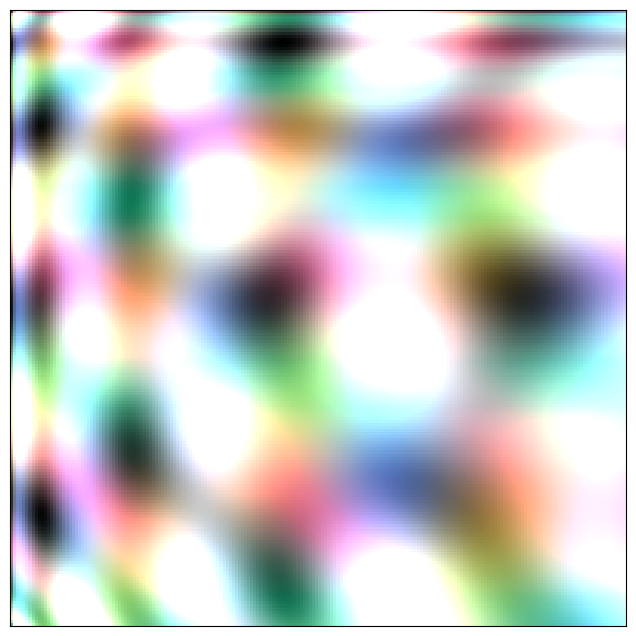

In [16]:
im_A = np.arange(200)[np.newaxis,:]*np.ones((200,200))
im_B = np.arange(200)[:,np.newaxis]*np.ones((200,200))
im_C = 0.9*im_A + 0.9*im_B
im_D = 0.9*im_A + 0.9*im_B[::-1]


im_A = _cm_listed_multivar.cmaps['4VarAddA0'](np.linspace(0,1,256))[(0.75*255*np.sin(im_A**0.5)**2).astype(int)] 
im_B = _cm_listed_multivar.cmaps['4VarAddA1'](np.linspace(0,1,256))[(0.75*255*np.sin(im_B**0.5)**2).astype(int)]
im_C = _cm_listed_multivar.cmaps['4VarAddA2'](np.linspace(0,1,256))[(0.75*255*np.sin(im_C**0.5)**2).astype(int)]
im_D = _cm_listed_multivar.cmaps['4VarAddA3'](np.linspace(0,1,256))[(0.75*255*np.sin(im_D**0.5)**2).astype(int)]
im = im_A + im_B + im_C + im_D
im[im>1] = 1
fig, ax = plt.subplots(1, 1, figsize = (8,8))

cm = ax.imshow(im)

ax.set_xticks([])
ax.set_yticks([])